## Kernel Density in python with scikit-learn and Seaborn
_obviously you need to install scikit-learn and seaborn:_
```
conda install scikit-learn
conda install seaborn
```
The scikit code is from [Kernel Density Estimation in Python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/).

The seaborn code is from [seaborn](http://seaborn.pydata.org/tutorial/distributions.html)

In [12]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy.stats.distributions import norm
import matplotlib.pyplot as plt
plt.style.use('crawlab')
import matplotlib
%matplotlib inline

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [2]:
# This creates a random distribution
np.random.seed(0)

# This is your data. What is currently there creates a bimodal distribution
x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])

# This is the range your data goes over
x_grid = np.linspace(-4.5, 3.5, 1000)

In [3]:
# You must first find the correct bandwidth
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(x[:, None])
bandwidth = grid.best_params_['bandwidth']
print(bandwidth)

0.193103448276


In [4]:
# Now create the PDF
pdf = kde_sklearn(x, x_grid, bandwidth=bandwidth)

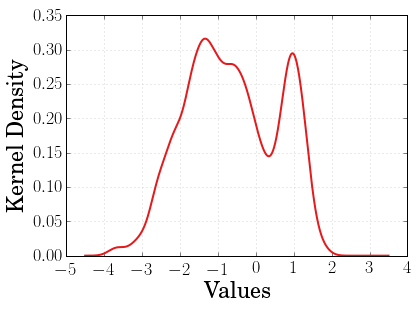

In [13]:
plt.plot(x_grid, pdf, label='Values')
plt.xlabel('Values')
plt.ylabel('Kernel Density')

## Now with Seaborn
_It is a little easier_

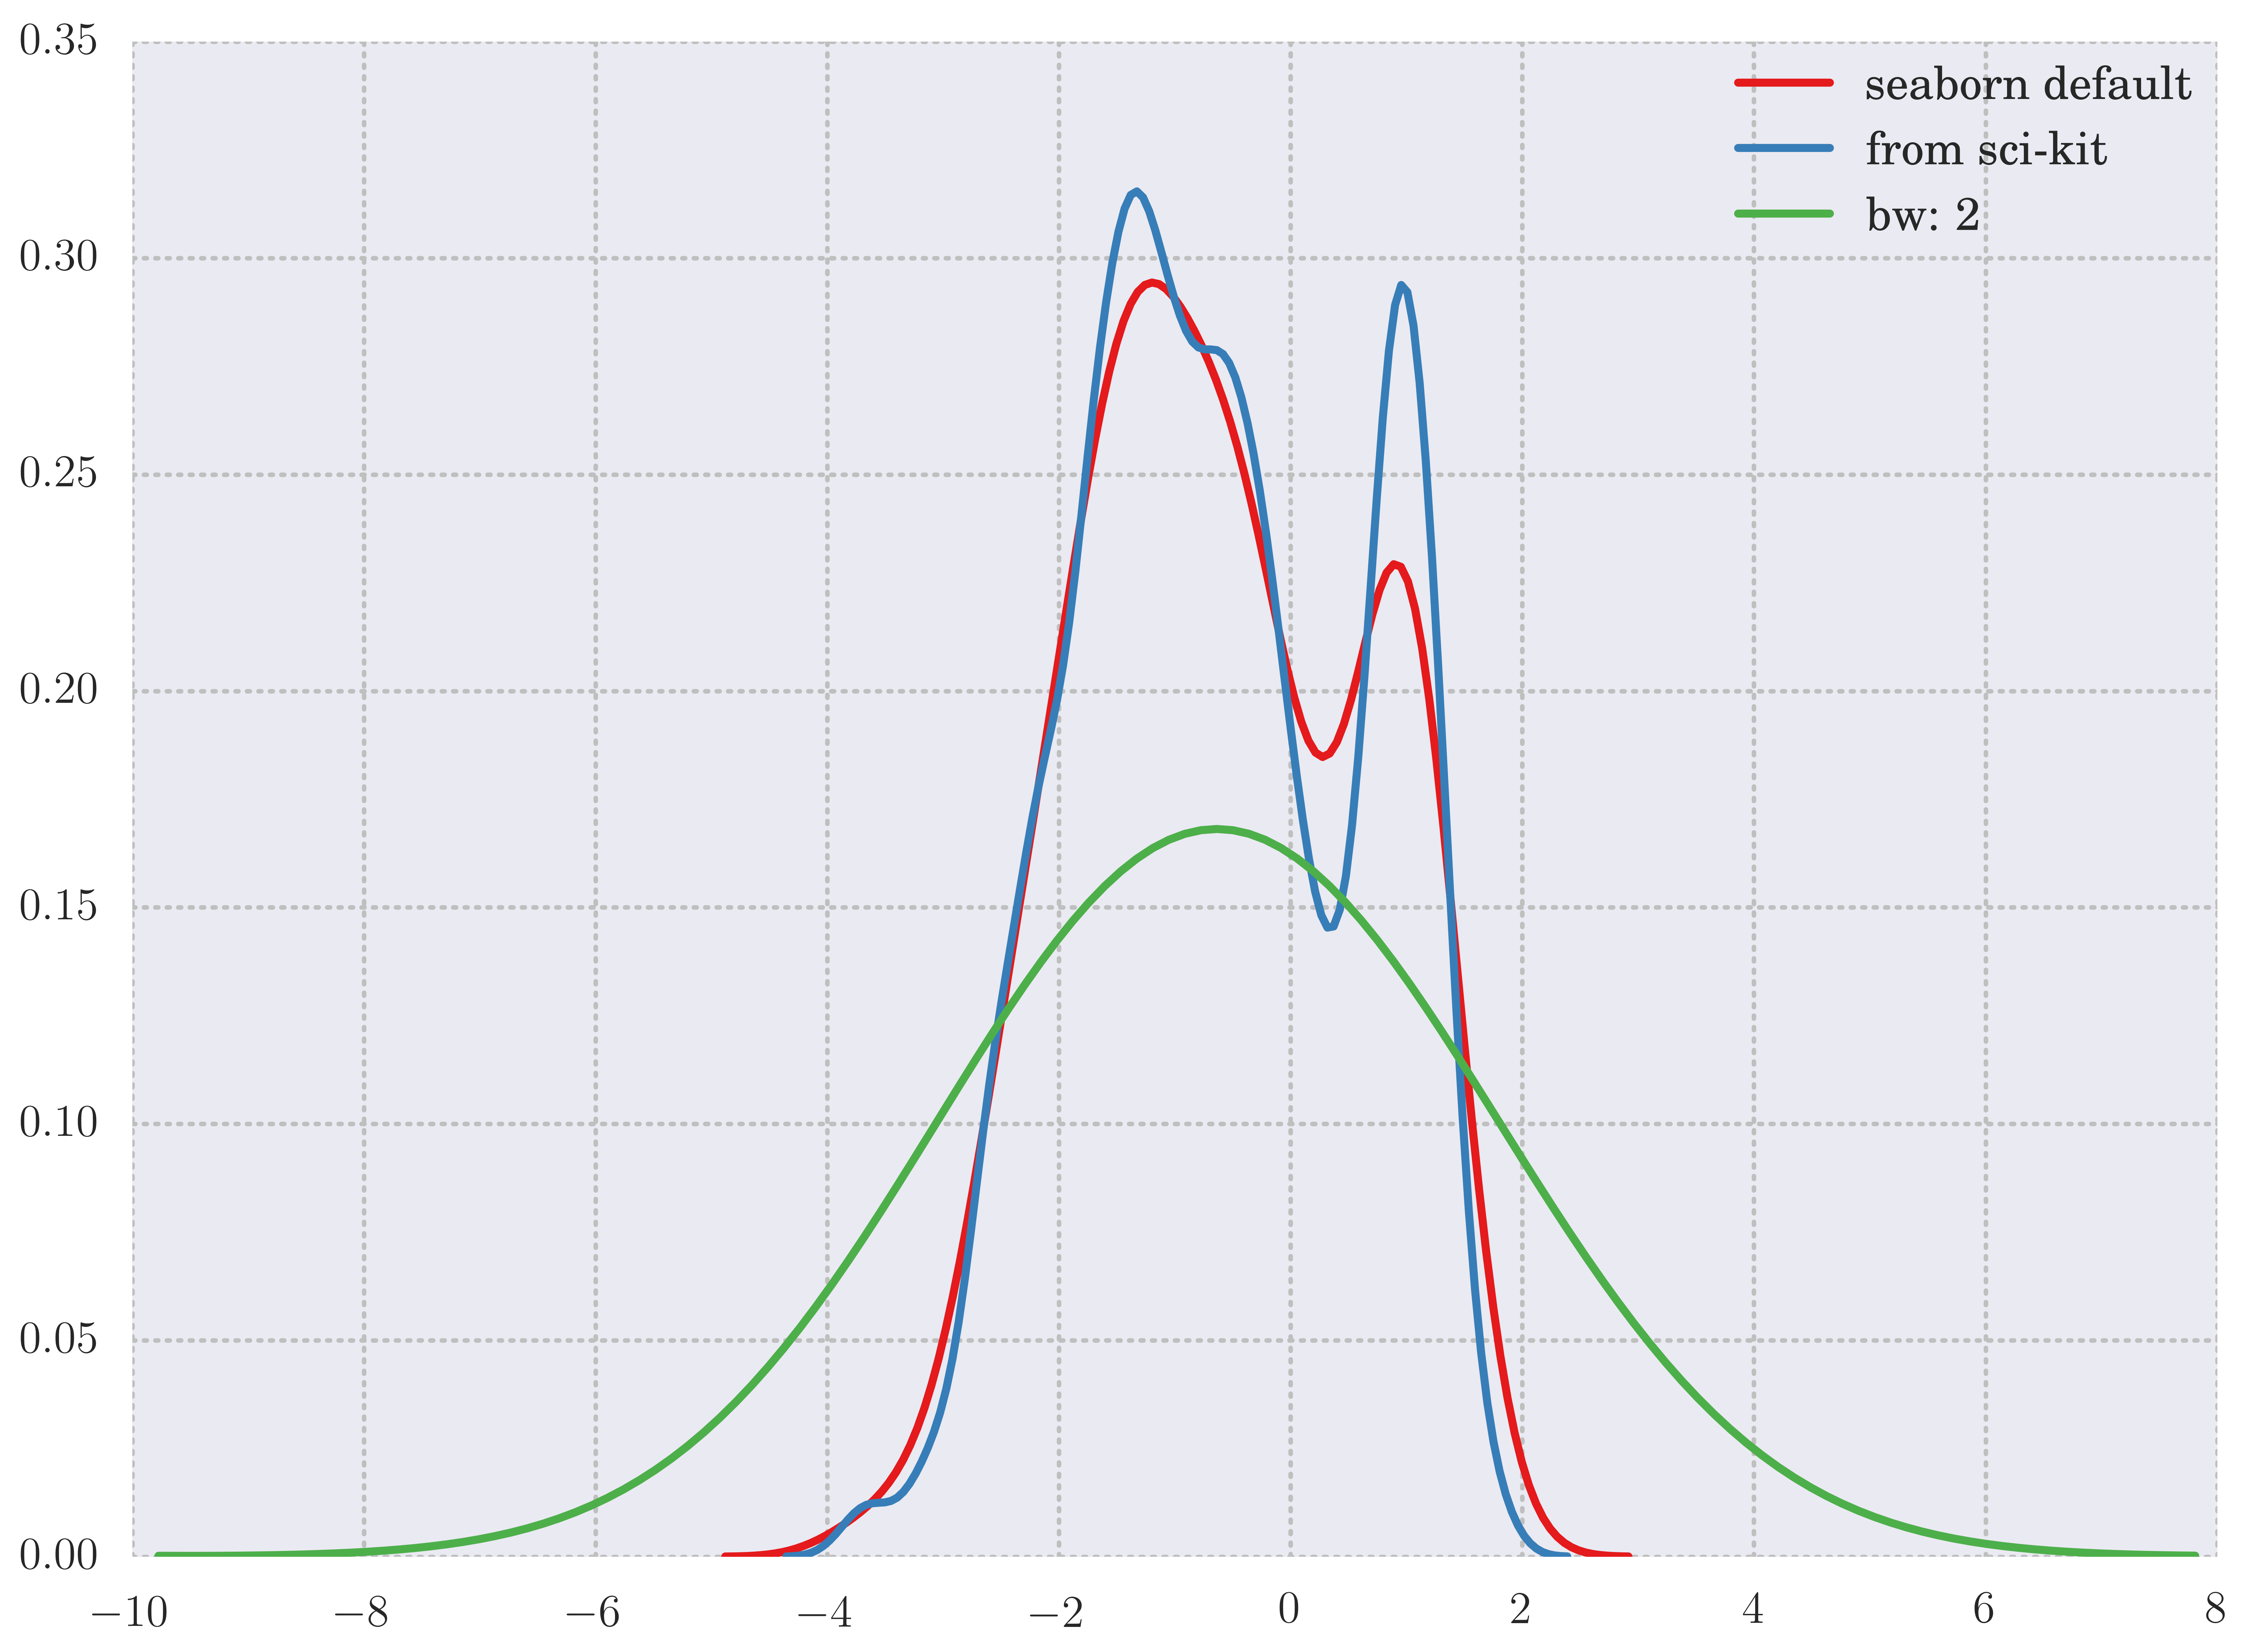

In [10]:
import seaborn as sns
sns.set_context("poster")
sns.kdeplot(x, label='seaborn default')
sns.kdeplot(x, bw=bandwidth, label="from sci-kit")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();
# sns.reset_orig();